Import dependencies

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_recall_curve, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score

1.Time: Time elapsed since the first transaction.
2.V1-V28: These columns are likely anonymized features resulting from a dimensionality reduction technique
like Principal Component Analysis (PCA) to protect user privacy.
3.Amount: The transaction amount.
4.Class: A binary indicator (0 or 1) representing whether the transaction is a fraudulent one (1) or not (0).

In [97]:

credit_card_data = pd.read_csv('D:/Akshaya(ML new)/creditcard.csv')

In [98]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [99]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Data preprocessing

In [100]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [101]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [102]:
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [103]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [104]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [105]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [106]:
# statistical measures of the data
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [107]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [108]:
legit_sample = legit.sample(n=492)

In [109]:
#Concatenating two DataFrames
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [110]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
192454,129700.0,0.190327,1.354927,-0.266769,2.631874,1.772051,0.456782,1.301126,0.011463,-1.605887,...,-0.012782,-0.100858,-0.176892,-0.085452,0.075913,-0.033711,-0.032403,-0.011130,11.80,0
110971,72046.0,-3.808926,4.160628,-2.411251,-0.032226,-0.822886,-0.819384,-0.230064,1.231487,1.776647,...,-0.201940,0.164130,0.240509,-0.443210,0.068530,-0.344064,1.347046,0.644043,0.89,0
151098,94611.0,-1.803809,1.894925,0.592898,-0.893600,1.376146,0.562466,1.253926,-0.468146,1.616257,...,-0.536899,-0.725073,-0.513627,-0.200361,0.758914,-0.570133,-1.546912,-1.058285,9.08,0
101816,67952.0,-0.425025,0.616886,0.503023,-0.949794,-0.751755,-0.718009,-0.163024,0.233222,-1.448136,...,0.094961,0.182438,0.050986,-0.104356,-0.273234,-0.303378,0.093446,0.051556,29.00,0
234964,148187.0,1.922641,-1.595810,-0.616538,-1.100507,-0.957953,0.631334,-1.331910,0.209933,0.224904,...,0.280165,0.555601,-0.017202,-1.429608,-0.363351,-0.196966,0.010813,-0.036520,142.20,0


In [111]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [112]:
# Check the distribution of both classes in the dataset
class_distribution=new_dataset['Class'].value_counts()  
print(class_distribution)

Class
0    492
1    492
Name: count, dtype: int64


In [113]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98158.621951,-0.045956,-0.059434,0.004673,-0.080377,-0.112770,0.038300,0.026455,0.013878,0.015629,...,0.041235,-0.004917,0.013033,0.003219,-0.006589,0.003305,0.001047,-0.009262,-0.020022,109.424858
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Data Visualization

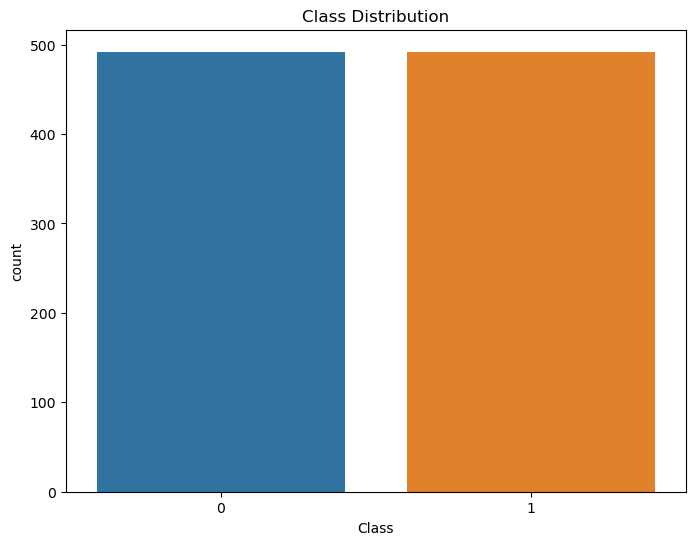

In [114]:
# Visualize class distribution 
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=new_dataset)
plt.title('Class Distribution')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7284\1867625315.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(new_dataset[credit_card_data['Class'] == 0]['Time'], bins=50, kde=True, color='blue', label='Class 0')
C:\Users\user\AppData\Local\Temp\ipykernel_7284\1867625315.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(new_dataset[credit_card_data['Class'] == 1]['Time'], bins=50, kde=True, color='red', label='Class 1')


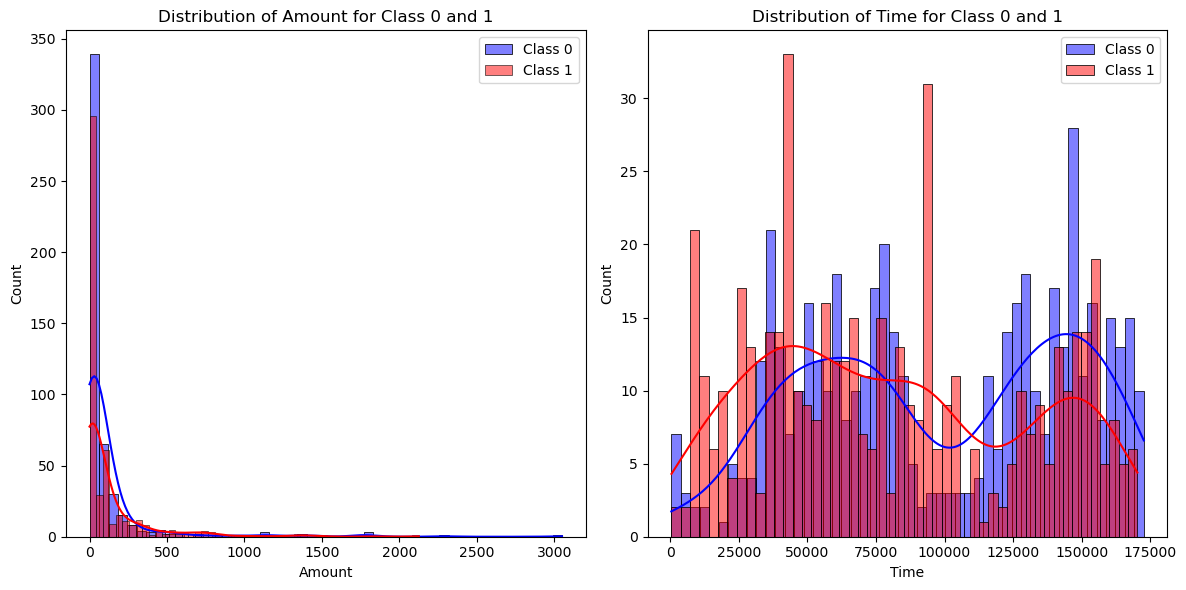

In [115]:
# Visualize the distribution of Amount and Time features for both classes

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(new_dataset[new_dataset['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Class 0')
sns.histplot(new_dataset[new_dataset['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Class 1')
plt.title('Distribution of Amount for Class 0 and 1')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(new_dataset[credit_card_data['Class'] == 0]['Time'], bins=50, kde=True, color='blue', label='Class 0')
sns.histplot(new_dataset[credit_card_data['Class'] == 1]['Time'], bins=50, kde=True, color='red', label='Class 1')
plt.title('Distribution of Time for Class 0 and 1')
plt.legend()

plt.tight_layout()
plt.show()

Splitting the data into Features & Targets

In [116]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [117]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
192454  129700.0  0.190327  1.354927 -0.266769  2.631874  1.772051  0.456782   
110971   72046.0 -3.808926  4.160628 -2.411251 -0.032226 -0.822886 -0.819384   
151098   94611.0 -1.803809  1.894925  0.592898 -0.893600  1.376146  0.562466   
101816   67952.0 -0.425025  0.616886  0.503023 -0.949794 -0.751755 -0.718009   
234964  148187.0  1.922641 -1.595810 -0.616538 -1.100507 -0.957953  0.631334   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [118]:
print(Y)

192454    0
110971    0
151098    0
101816    0
234964    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [119]:
#Split the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [120]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

In [121]:
# Linear Regression
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [122]:
# training the Linear Regression Model with Training Data
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [123]:
from sklearn.model_selection import GridSearchCV

# Example of grid search for finding the best k
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']

# Use the best k value in your model
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, Y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute" and ArgKm

KNeighborsClassifier(n_neighbors=3)

In [124]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use the scaled features in your model
model.fit(X_train_scaled, Y_train)


KNeighborsClassifier(n_neighbors=3)

Precision: 0.9545
Recall: 0.8571
F1-score: 0.9032
AUC-ROC: 0.9084


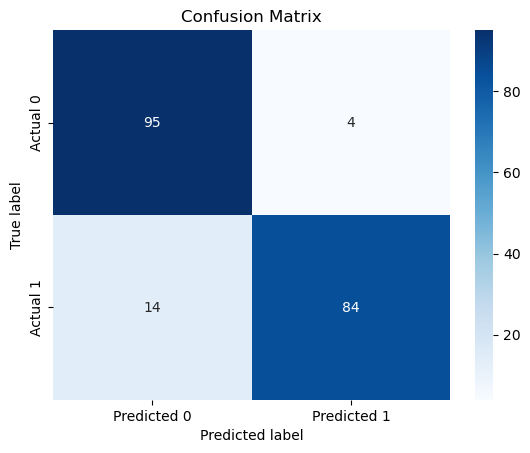

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Find the best k value using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_scaled, Y_train)
best_k = grid_search.best_params_['n_neighbors']

# Train the model with the best k value
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train_scaled, Y_train)

# Predict the class labels
y_pred = model.predict(X_test_scaled)

# Calculate metrics
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
auc_roc = roc_auc_score(Y_test, y_pred)

# Print metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')

# Visualize Confusion Matrix
conf_mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


Model Evaluation

Checking the accuracy of train and test data

In [126]:
# Check the accuracy on the training set
train_accuracy = model.score(X_train_scaled, Y_train)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Check the accuracy on the test set
test_accuracy = model.score(X_test_scaled, Y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


Training Accuracy: 0.9225
Test Accuracy: 0.9086
